In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import Dataset



## Import 2021 Dataset

This is the original Dataset from 2021

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_2021_CO2_Project.csv')

<ipython-input-3-3ec0608b1200>:1: DtypeWarning: Columns (2,3,8,12,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/data_2021_CO2_Project.csv')


##Reduce Dataset to France only

In [ ]:
# Keep Only Fr observations
df = df[df.Country == 'FR']


In [ ]:
import shutil #Export Dataset to Drive
df.to_csv('/content/data_2021_CO2_Project_Fr.csv', index=False)
shutil.move('/content/data_2021_CO2_Project_Fr.csv', '/content/drive/MyDrive/')

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/data_2021_CO2_Project_Fr.csv')

# Explore Dataset

In [ ]:
df.head()

,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,...,IT,Ernedc (g/km),Erwltp (g/km),De,Vf,Status,year,Date of registration,Fuel consumption,Electric range (km)
183427,55550000,FR,IP-03_312_0290-ZFA-1,STELLANTIS,FIAT GROUP,FCA ITALY SPA,NaN,E3*2007/46*0064*64,312,PYD1B,...,e3 33,NaN,1.3,NaN,NaN,P,2021,2021-12-29,4.9,NaN
183428,55550001,FR,IP-03_312_0290-ZFA-1,STELLANTIS,FIAT GROUP,FCA ITALY SPA,NaN,E3*2007/46*0064*64,312,PYD1B,...,e3 33,NaN,1.3,NaN,NaN,P,2021,2021-12-30,4.9,NaN
183429,55550002,FR,IP-03_312_0290-ZFA-1,STELLANTIS,FIAT GROUP,FCA ITALY SPA,NaN,E3*2007/46*0064*64,312,PYD1B,...,e3 33,NaN,1.3,NaN,NaN,P,2021,2021-12-31,4.9,NaN
183430,55550003,FR,IP-03_312_0290-ZFA-1,STELLANTIS,FIAT GROUP,FCA ITALY SPA,NaN,E3*2007/46*0064*64,312,PYD1B,...,e3 33,NaN,1.3,NaN,NaN,P,2021,2021-12-30,4.9,NaN
183431,55550004,FR,IP-03_312_0208-ZFA-1,STELLANTIS,FIAT GROUP,FCA ITALY SPA,NaN,E3*2007/46*0064*57,312,PYD1B,...,NaN,NaN,NaN,NaN,NaN,P,2021,2021-01-26,NaN,NaN


## Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1777878 entries, 183427 to 7896715
Data columns (total 38 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Country               object 
 2   VFN                   object 
 3   Mp                    object 
 4   Mh                    object 
 5   Man                   object 
 6   MMS                   float64
 7   Tan                   object 
 8   T                     object 
 9   Va                    object 
 10  Ve                    object 
 11  Mk                    object 
 12  Cn                    object 
 13  Ct                    object 
 14  Cr                    object 
 15  r                     int64  
 16  m (kg)                float64
 17  Mt                    float64
 18  Enedc (g/km)          float64
 19  Ewltp (g/km)          float64
 20  W (mm)                float64
 21  At1 (mm)              float64
 22  At2 (mm)              float64
 23  Ft

In [ ]:
unique_val_count = [df[col].nunique() for col in df.columns]
print(unique_val_count)
pd.DataFrame({'Columns': df.columns, 'Count of unique values':unique_val_count})

[1777878, 1, 3248, 10, 65, 64, 0, 2173, 357, 2196, 9459, 62, 580, 2, 2, 1, 1149, 1972, 26, 341, 272, 245, 265, 10, 6, 113, 218, 226, 65, 0, 22, 0, 0, 1, 1, 354, 155, 470]


,Columns,Count of unique values
0,ID,1777878
1,Country,1
2,VFN,3248
3,Mp,10
4,Mh,65
5,Man,64
6,MMS,0
7,Tan,2173
8,T,357
9,Va,2196


## Missing Values per column (%)



In [ ]:
miss_val_percentage = list(map(lambda col : df[col].isna().sum()*100/len(df), df.columns))
pd.DataFrame({'Missing values (%)' : miss_val_percentage}, index=df.columns)

,Missing values (%)
ID,0.000000
Country,0.000000
VFN,0.000000
Mp,1.082920
Mh,0.000000
Man,0.000000
MMS,100.000000
Tan,0.000000
T,0.000000
Va,0.000000


#Renaming columns

In [ ]:
renaming_mapping = {col : col.replace(' ', '_')
                    .replace(')', '')
                    .replace('(', '')
                    for col in df.columns}
renaming_mapping['Electric range (km)'] = 'Er_km'
renaming_mapping['Fuel consumption '] = 'Fc'
renaming_mapping['Date of registration'] = 'Rd'
df.rename(columns = renaming_mapping, inplace = True)
df.columns

Index(['ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T', 'Va',
       'Ve', 'Mk', 'Cn', 'Ct', 'Cr', 'r', 'm_kg', 'Mt', 'Enedc_g/km',
       'Ewltp_g/km', 'W_mm', 'At1_mm', 'At2_mm', 'Ft', 'Fm', 'ec_cm3', 'ep_KW',
       'z_Wh/km', 'IT', 'Ernedc_g/km', 'Erwltp_g/km', 'De', 'Vf', 'Status',
       'year', 'Rd', 'Fc', 'Er_km'],
      dtype='object')

#Dropping Data


## Remove columns with 100% missing values

In [ ]:
print([col for col in df.columns if df[col].isna().sum() == len(df)])
df.dropna(axis = 1, how = 'all', inplace = True)


['MMS', 'Ernedc_g/km', 'De', 'Vf']




##1.   Dropping columns with too many categories



In [ ]:
df = df[['Mp','Cr','m_kg','Ewltp_g/km','W_mm','At1_mm','Ft','Fm','ec_cm3','ep_KW','z_Wh/km','IT','Erwltp_g/km','Fc','Er_km']]

##2.   Dropping lines if missing values < 1%





In [ ]:
# According to Missing values per column %, only Mp Feature is treated here
df = df.drop(df.loc[df.Mp.isna()].index, axis=0)



##3.   Dropping non-polluting cars




In [ ]:
df = df.drop(df.loc[df.Ft.isin(['ELECTRIC', 'UNKNOWN', 'HYDROGEN'])].index, axis=0)

##4. Dropping very low observations

In [ ]:
#Dropping 'NG', 'NG-BIOMETHANE' categories due to very low observations percentages
df.drop(df.loc[df.Ft.isin(['NG', 'NG-BIOMETHANE'])].index, inplace=True)


#Filling Missing values

In [ ]:
#Filling missing values for z_Wh/km by 0 if car is not Hybrid
df.loc[((df['z_Wh/km'].isna()) & (df.Ft.isin(['PETROL', 'DIESEL', 'NG-BIOMETHANE', 'NG', 'E85', 'LPG']))),'z_Wh/km'] = 0

In [ ]:
#Setting It to 0/1 depending if the value has or not an IT tech
df.IT = np.where(df.IT.isna(), 0, 1)

In [ ]:
#Filling Electric range (km) is 0 for non_hybrid cars
df.Er_km = np.where(~df.Ft.isin(['PETROL/ELECTRIC', 'DIESEL/ELECTRIC']), 0, df.Er_km)

In [ ]:
#Filling missing values for Erwltp_g/km with 0
df['Erwltp_g/km'] = df['Erwltp_g/km'].fillna(0)

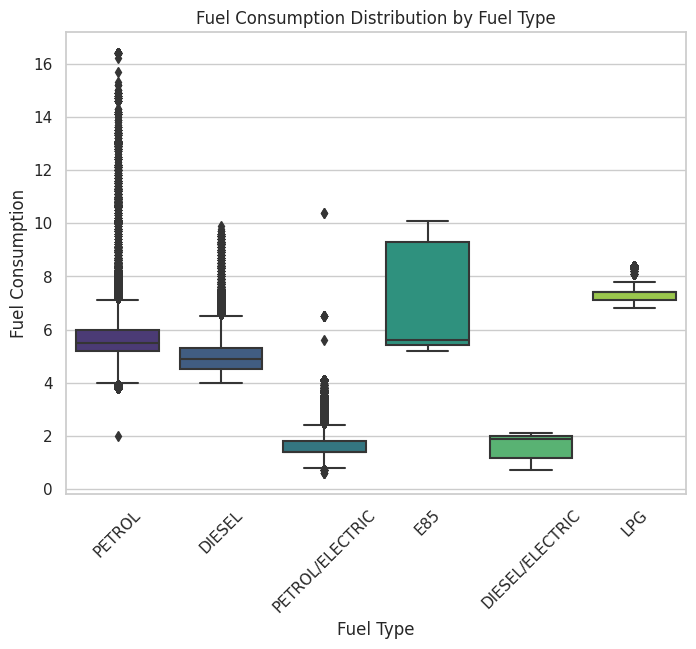

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme for a better aesthetic
sns.set_theme(style="whitegrid", palette="viridis")

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Ft', y='Fc', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Fuel Type')
plt.ylabel('Fuel Consumption')
plt.title('Fuel Consumption Distribution by Fuel Type')

# Save the plot as an image file (e.g., PNG)
plt.savefig('fuel_consumption_boxplot.png', bbox_inches='tight')

# Show the plot in the Jupyter Notebook
plt.show()

In [ ]:
#Fill missing values for Fuel consumption by the median of the corresponding class in term of Fuel Type

fc_med_per_ft_category = df.groupby(['Ft'])['Fc'].median()
# Create a new column with median values based on 'Ft'
df['Fc_median'] = df['Ft'].map(fc_med_per_ft_category)

# Fill missing values in 'Fc' based on the corresponding 'Fc_median' values
df['Fc'].fillna(df['Fc_median'], inplace=True)

# Drop the temporary 'Fc_median' column if you no longer need it
df.drop('Fc_median', axis=1, inplace=True)


#Regrouping

##New groups for Fuel Type: Hybrid and Others

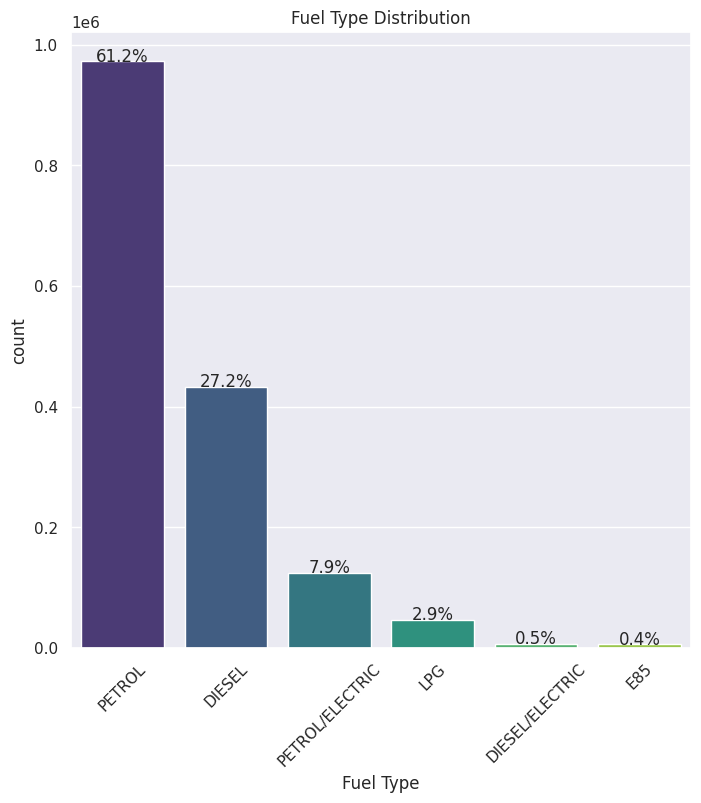

In [ ]:
#Check Fuel Type distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already created a Seaborn plot
df_plt = df.Ft.value_counts(normalize=True) * 100
df_plt = df_plt.sort_values(ascending=False)

plt.figure(figsize=(8, 8))
sns.set_theme()  # Optional: set the Seaborn theme for a better aesthetic
ax = sns.countplot(x=df.Ft, data=df, order=df_plt.index, palette='viridis')  # Use x=df.Ft instead of x=index
plt.xticks(rotation=45)
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')

# Switch y-axis to percentage
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1,
            f'{height/total:.1%}', ha="center")

# Save the plot as an image file (e.g., PNG)
plt.savefig('fuel_type_distribution_percentage.png', bbox_inches='tight')

# Show the plot in the Jupyter Notebook
plt.show()


In [ ]:
#Check Fuel Type distribution
df.Ft.value_counts(normalize=True)*100

PETROL             61.168877
DIESEL             27.217395
PETROL/ELECTRIC     7.863951
LPG                 2.919205
DIESEL/ELECTRIC     0.455041
E85                 0.375531
Name: Ft, dtype: float64

In [ ]:
#Grouping cars into new categories Hybrid for 'PETROL/ELECTRIC' and 'DIESEL/ELECTRIC', others for 'E85', 'LPG' to deal with very low observations percentages
df.Ft = df.Ft.replace({'PETROL/ELECTRIC' : 'HYBRID', 'DIESEL/ELECTRIC' : 'HYBRID', 'E85' : 'OTHER', 'LPG' : 'OTHER'})


In [ ]:
#Check Fuel Type distribution again
df.Ft.value_counts(normalize=True)*100

PETROL    61.168877
DIESEL    27.217395
HYBRID     8.318991
OTHER      3.294736
Name: Ft, dtype: float64

#Check new Dataframe

###Check missing values


In [ ]:
df.isna().any()

Mp             False
Cr             False
m_kg           False
Ewltp_g/km     False
W_mm           False
At1_mm         False
Ft             False
Fm             False
ec_cm3         False
ep_KW          False
z_Wh/km        False
IT             False
Erwltp_g/km    False
Fc             False
Er_km          False
dtype: bool

In [ ]:
df_copy2 = df.copy()

###Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589748 entries, 183427 to 7896715
Data columns (total 15 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Mp           1589748 non-null  object 
 1   Cr           1589748 non-null  object 
 2   m_kg         1589748 non-null  float64
 3   Ewltp_g/km   1589748 non-null  float64
 4   W_mm         1589748 non-null  float64
 5   At1_mm       1589748 non-null  float64
 6   Ft           1589748 non-null  object 
 7   Fm           1589748 non-null  object 
 8   ec_cm3       1589748 non-null  float64
 9   ep_KW        1589748 non-null  float64
 10  z_Wh/km      1589748 non-null  float64
 11  IT           1589748 non-null  int64  
 12  Erwltp_g/km  1589748 non-null  float64
 13  Fc           1589748 non-null  float64
 14  Er_km        1589748 non-null  float64
dtypes: float64(10), int64(1), object(4)
memory usage: 194.1+ MB


#Label Encoding/One Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns=['Mp', 'Ft', 'Fm'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
df.Cr = LabelEncoder().fit_transform(df.Cr)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589748 entries, 183427 to 7896715
Data columns (total 31 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Cr                             1589748 non-null  int64  
 1   m_kg                           1589748 non-null  float64
 2   Ewltp_g/km                     1589748 non-null  float64
 3   W_mm                           1589748 non-null  float64
 4   At1_mm                         1589748 non-null  float64
 5   ec_cm3                         1589748 non-null  float64
 6   ep_KW                          1589748 non-null  float64
 7   z_Wh/km                        1589748 non-null  float64
 8   IT                             1589748 non-null  int64  
 9   Erwltp_g/km                    1589748 non-null  float64
 10  Fc                             1589748 non-null  float64
 11  Er_km                          1589748 non-null  float64
 12  Mp_BMW   